<a href="https://colab.research.google.com/github/csaiprashant/tensorflow2.0/blob/master/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [6]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
print("X_train.shape:", X_train.shape)

X_train.shape: (60000, 28, 28)


In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3005 - accuracy: 0.9122 - val_loss: 0.1444 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1429 - accuracy: 0.9571 - val_loss: 0.0970 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1086 - accuracy: 0.9668 - val_loss: 0.0824 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0859 - accuracy: 0.9735 - val_loss: 0.0735 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9766 - val_loss: 0.0783 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0659 - accuracy: 0.9793 - val_loss: 0.0686 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0563 - accuracy: 0.9819 - val_loss: 0.0714 - val_accuracy:

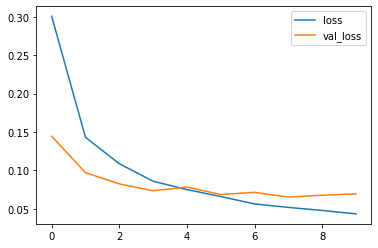

In [10]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

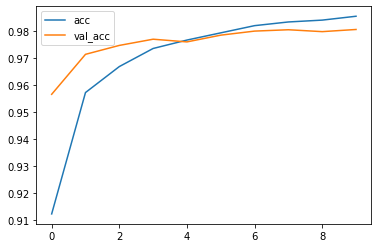

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
print(model.evaluate(X_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0694 - accuracy: 0.9805
[0.06940311938524246, 0.9804999828338623]


Confusion matrix, without normalization
[[ 972    0    1    0    0    1    2    1    3    0]
 [   0 1125    1    3    0    1    2    1    2    0]
 [   5    0 1010    1    1    0    2    6    7    0]
 [   0    0    6  989    0    5    0    4    3    3]
 [   0    0    3    1  955    0    6    0    3   14]
 [   4    0    0   11    0  871    2    1    1    2]
 [   7    2    1    1    1    6  938    0    2    0]
 [   1    3    7    2    0    0    0 1008    2    5]
 [   6    1    1    7    3    3    2    2  947    2]
 [   2    2    0    3    4    3    0    3    2  990]]


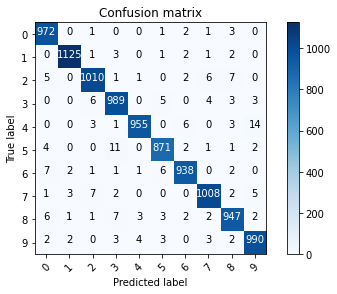

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

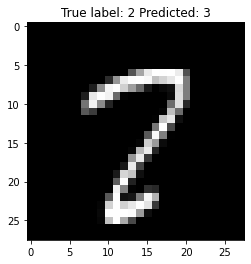

In [17]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));